In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
# load and investigate the data here:

t_df = pd.read_csv('tennis_stats.csv')
t_df.describe(include= 'all')
t_df.sort_values('Ranking')
t_df.info()

# look for any na's in df
t_df.isna().any()

# look for any duplicates in df
print(t_df.duplicated().sum()) # shows two duplicates

# drop duplicate rows
t_df.drop_duplicates(inplace= True)
t_df.describe(include= 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1719,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1.719000e+03,1719.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Andrey Kuznetsov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.645143,0.598074,0.680762,0.261675,0.479697,0.466446,97.193136,0.369412,112.078534,...,0.173857,0.342216,197.806283,0.715602,0.473159,0.599250,7.884235,9.285631,2.346039e+05,269.665503
std,NaN,2.489037,0.054560,0.070456,0.056656,0.066932,0.068486,138.022218,0.163066,119.296620,...,0.080920,0.049395,221.290038,0.123356,0.037160,0.057751,10.187302,8.999507,2.531794e+05,277.498671
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.924200e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.500000,0.430000,201.500000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.501090e+05,333.000000


In [16]:
# perform exploratory analysis here:
t_df.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051629,-0.016546,-0.106815,0.005015,-0.038989,-0.108058,-0.072406,-0.101427,-0.114451,...,-0.073050,-0.078155,-0.108135,-0.008877,-0.041743,-0.005498,-0.107882,-0.076806,0.044158,-0.040383
FirstServe,0.051629,1.000000,-0.070725,0.025335,0.101581,-0.001973,0.047952,-0.018976,0.057523,0.062123,...,-0.010855,0.004068,0.071708,0.137498,0.148329,0.181002,0.064601,0.053494,0.057759,-0.068831
FirstServePointsWon,-0.016546,-0.070725,1.000000,0.021961,0.321043,-0.004806,0.460257,-0.041424,0.301808,0.324738,...,-0.010256,-0.002744,0.376368,0.817835,0.648790,0.860069,0.356620,0.330491,0.361038,-0.150079
FirstServeReturnPointsWon,-0.106815,0.025335,0.021961,1.000000,0.072630,0.301413,0.140220,0.323853,0.295873,0.313494,...,0.757561,0.834310,0.261319,0.091512,0.496825,0.052419,0.256100,0.243340,0.240935,-0.178727
SecondServePointsWon,0.005015,0.101581,0.321043,0.072630,1.000000,0.103700,0.266641,0.052712,0.259061,0.278221,...,0.096799,0.095628,0.297232,0.650948,0.622802,0.713230,0.269397,0.251341,0.281485,-0.180951
SecondServeReturnPointsWon,-0.038989,-0.001973,-0.004806,0.301413,0.103700,1.000000,0.095405,0.264472,0.234148,0.249522,...,0.603770,0.727397,0.209452,0.096523,0.408968,0.054984,0.193023,0.185145,0.199344,-0.159631
Aces,-0.108058,0.047952,0.460257,0.140220,0.266641,0.095405,1.000000,0.037185,0.757321,0.784850,...,0.139800,0.137967,0.866088,0.440954,0.428701,0.472139,0.825236,0.768540,0.798370,-0.277973
BreakPointsConverted,-0.072406,-0.018976,-0.041424,0.323853,0.052712,0.264472,0.037185,1.000000,0.096394,0.086518,...,0.561766,0.387086,0.083189,-0.025582,0.255072,-0.007217,0.076972,0.062271,0.075051,-0.051017
BreakPointsFaced,-0.101427,0.057523,0.301808,0.295873,0.259061,0.234148,0.757321,0.096394,1.000000,0.973346,...,0.335077,0.331043,0.971288,0.354019,0.463138,0.354018,0.883432,0.943296,0.876020,-0.322250
BreakPointsOpportunities,-0.114451,0.062123,0.324738,0.313494,0.278221,0.249522,0.784850,0.086518,0.973346,1.000000,...,0.358341,0.352787,0.978269,0.372301,0.491252,0.380752,0.923420,0.909255,0.900452,-0.334758


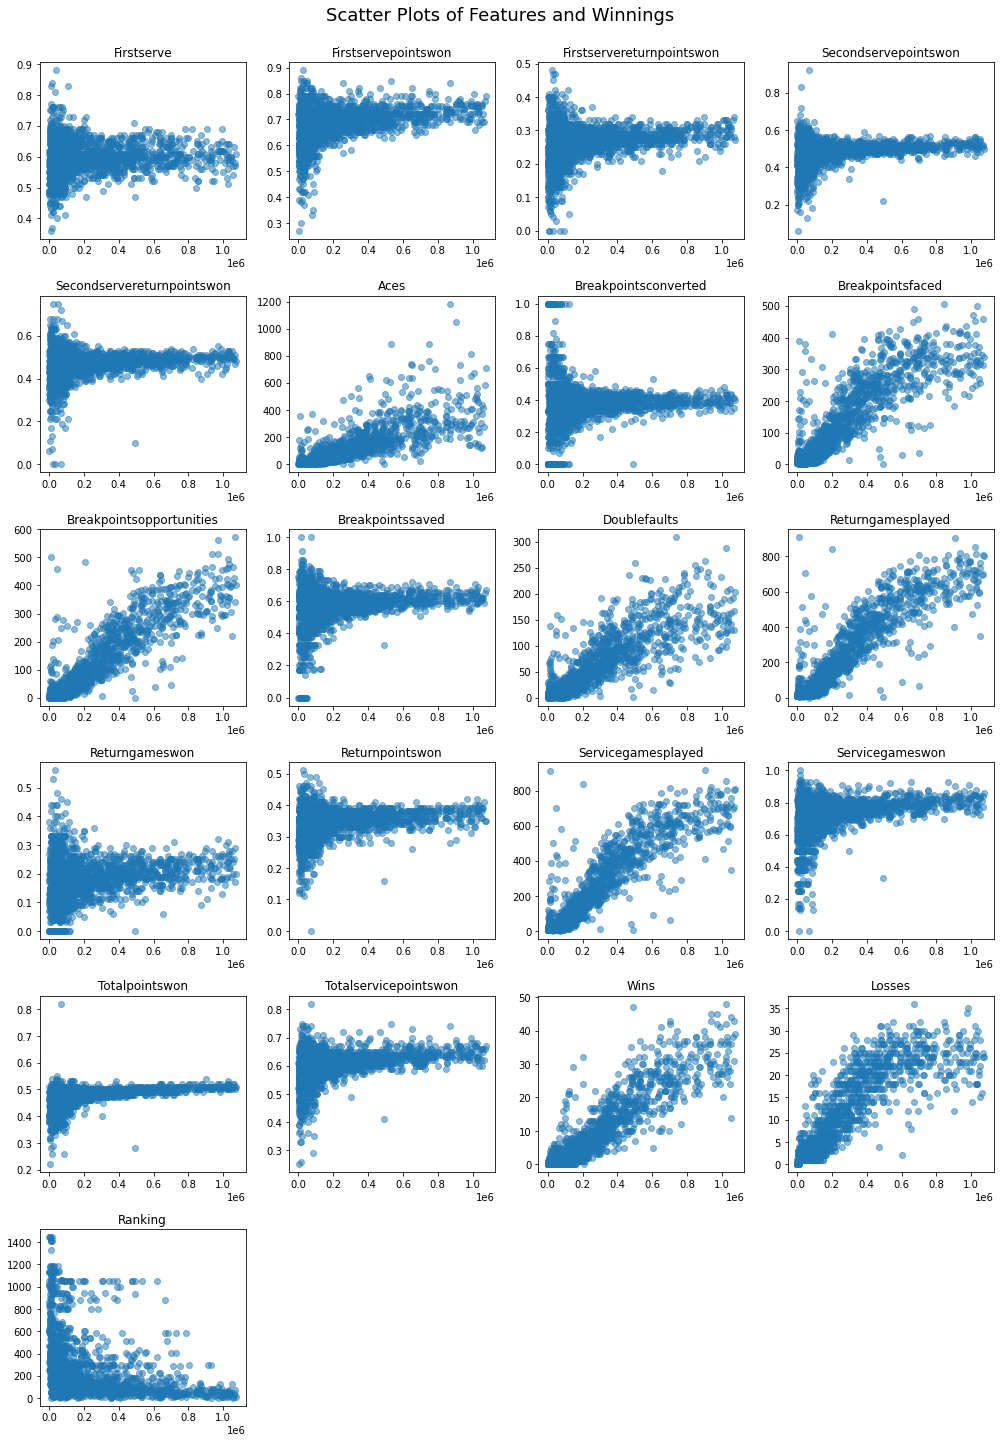

In [41]:
# Create scatterplots of independent variables and Winnings

independent_vars = t_df.columns.values.tolist()
no_vars = ['Player', 'Year', 'Winnings']

fig = plt.figure(figsize=(14, 20))
plt.subplots_adjust(hspace= 0.40, wspace= 0.40)
plt.suptitle('Scatter Plots of Features and Winnings', fontsize=18, y=1)

i = 0
# loop through the length of statuses and keep track of indices

for iv in independent_vars:
    if iv not in no_vars:
        i = i + 1
        ax = plt.subplot(6, 4, i)

        # add a new subplot iteratively
        plt.scatter(x= t_df.Winnings, y= t_df[iv], alpha= 0.5)

        # formatting the figures & plots
#         ax.ticklabel_format(style='plain', axis= 'x')
        ax.set_title(iv.title())
#         ax.set_xticklabels(ax.get_xticks(), rotation= 35)
        ax.set_xlabel('')
        ax.set_ylabel('')

fig.tight_layout()
# plt.savefig('Observation Distributions by Category & Park.png', dpi= 600)

In [50]:
# create function to run linear regression
def regression(list_of_features, dependent_variable):
    # subset data for linear regression
    features = t_df[list_of_features]
    outcome = t_df[dependent_variable]

    # split data into testing and training set
    X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size= 0.2, random_state= 1)

    # create linear regression instance
    lm = LinearRegression()

    # fit model on training data
    lm.fit(X_train, y_train)

    # output R^2's from training and testing data
    print('Train R^2: ', lm.score(X_train, y_train))
    print('Test R^2: ', lm.score(X_test, y_test))
    print(sorted(list(zip(list_of_features, lm.coef_)),key = lambda x: abs(x[1]),reverse=True))

## perform single feature linear regressions here:

In [51]:
# run regression of Winnings on Aces
regression(['Aces'], 'Winnings')

Train R^2:  0.6399152133292716
Test R^2:  0.6239275357651282
[('Aces', 1524.3918141229792)]


In [58]:
# run regression of Winnings on Wins
regression(['Wins'], 'Winnings')

Train R^2:  0.8250987056431518
Test R^2:  0.8637615918332191
[('Wins', 22328.51446186945)]


In [59]:
# run regression of Winnings on Losses
regression(['Losses'], 'Winnings')

Train R^2:  0.7621156907142002
Test R^2:  0.7318155470438104
[('Losses', 24144.332140403712)]


In [60]:
# run regression of Winnings on BreakPointsFaced
regression(['BreakPointsFaced'], 'Winnings')

Train R^2:  0.781194634069279
Test R^2:  0.7185341629113325
[('BreakPointsFaced', 1832.9752077266082)]


In [61]:
# run regression of Winnings on BreakPointsOpportunities
regression(['BreakPointsOpportunities'], 'Winnings')

Train R^2:  0.8147016057636238
Test R^2:  0.7946644963892091
[('BreakPointsOpportunities', 1814.4546258991697)]


## perform two feature linear regressions here:

In [62]:
# run regression of Winnings on Aces, and Wins
regression(['Aces', 'Wins'], 'Winnings')

Train R^2:  0.831564590610137
Test R^2:  0.8697697205928945
[('Wins', 19370.18880306976), ('Aces', 275.8180272256417)]


In [63]:
# run regression of Winnings on BreakPointsFaced, and Wins
regression(['BreakPointsFaced', 'Wins'], 'Winnings')

Train R^2:  0.8545515058193989
Test R^2:  0.8565047796314398
[('Wins', 14305.483595191905), ('BreakPointsFaced', 764.743026950193)]


In [64]:
# run regression of Winnings on BreakPointsOpportunities, and Wins
regression(['BreakPointsOpportunities', 'Wins'], 'Winnings')

Train R^2:  0.8524332251541717
Test R^2:  0.8661135952302851
[('Wins', 12497.92916245119), ('BreakPointsOpportunities', 869.9233887913982)]


## perform multiple feature linear regressions here:

In [74]:
# run regression of Winnings on all iv's except multico vars
independent_vars = t_df.columns.values.tolist()
no_vars = ['Player', 'Year', 'Winnings', 'Wins', 'Losses', 'Ranking']
factors = [i for i in independent_vars if i not in no_vars]

regression(factors, 'Winnings')

Train R^2:  0.8401355607711363
Test R^2:  0.8413525683916449
[('TotalPointsWon', -405997.63786817825), ('FirstServePointsWon', 221206.98184433972), ('SecondServePointsWon', 143701.25317124906), ('ReturnGamesWon', 78886.53769135923), ('TotalServicePointsWon', -64307.9768638043), ('BreakPointsSaved', 50962.92536615687), ('ServiceGamesWon', -45796.94917620821), ('FirstServe', 45765.156167570414), ('SecondServeReturnPointsWon', 35035.28032812177), ('FirstServeReturnPointsWon', -29632.11808675206), ('ReturnPointsWon', 8113.8285971841815), ('BreakPointsConverted', -1535.6360013649837), ('DoubleFaults', 708.229655492336), ('ServiceGamesPlayed', 684.2099422375904), ('BreakPointsFaced', -657.3816634975374), ('BreakPointsOpportunities', 652.7827181004541), ('ReturnGamesPlayed', 203.6324247737357), ('Aces', -84.94782945841871)]


In [76]:
# run regression of Winnings on all iv's except multico vars
independent_vars = t_df.columns.values.tolist()
no_vars = ['Player',
           'Year',
           'Winnings',
           'Wins',
           'Losses',
           'Ranking',
           'FirstServe',
           'SecondServeReturnPointsWon',
           'BreakPointsConverted']
factors = [i for i in independent_vars if i not in no_vars]

regression(factors, 'Winnings')

Train R^2:  0.8400960280915354
Test R^2:  0.8413627642696986
[('TotalPointsWon', -382503.93839688133), ('FirstServePointsWon', 116386.14282081678), ('TotalServicePointsWon', 97160.87369819608), ('SecondServePointsWon', 75917.52547471317), ('ReturnGamesWon', 74660.28448037963), ('ReturnPointsWon', 74413.2115172119), ('FirstServeReturnPointsWon', -69006.75369608979), ('BreakPointsSaved', 50921.74431943348), ('ServiceGamesWon', -44682.508317358224), ('DoubleFaults', 704.5567161388062), ('ServiceGamesPlayed', 689.336053998115), ('BreakPointsFaced', -657.2427033599706), ('BreakPointsOpportunities', 652.4907688846724), ('ReturnGamesPlayed', 199.8480186008601), ('Aces', -85.32113764532187)]
